# scikitlearn,keras,tensorflowによる実践機械学習No.2
# *ML実装の一連の流れ*

## データの読み込みとcsv取り込み

In [52]:
import os
import sys
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
import tarfile

ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
IMAGES_PATH = os.path.join(ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path) #tar fileのオープン
    housing_tgz.extractall(path=housing_path)#all file 解凍
    housing_tgz.close()
    
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_file = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_file)

housing = load_housing_data()
#pd.DataFrame(housing)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## データの概要把握

In [53]:

#housing.head()

housing.info()

housing["ocean_proximity"].value_counts()
#housing["latitude"].value_counts()

housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plt


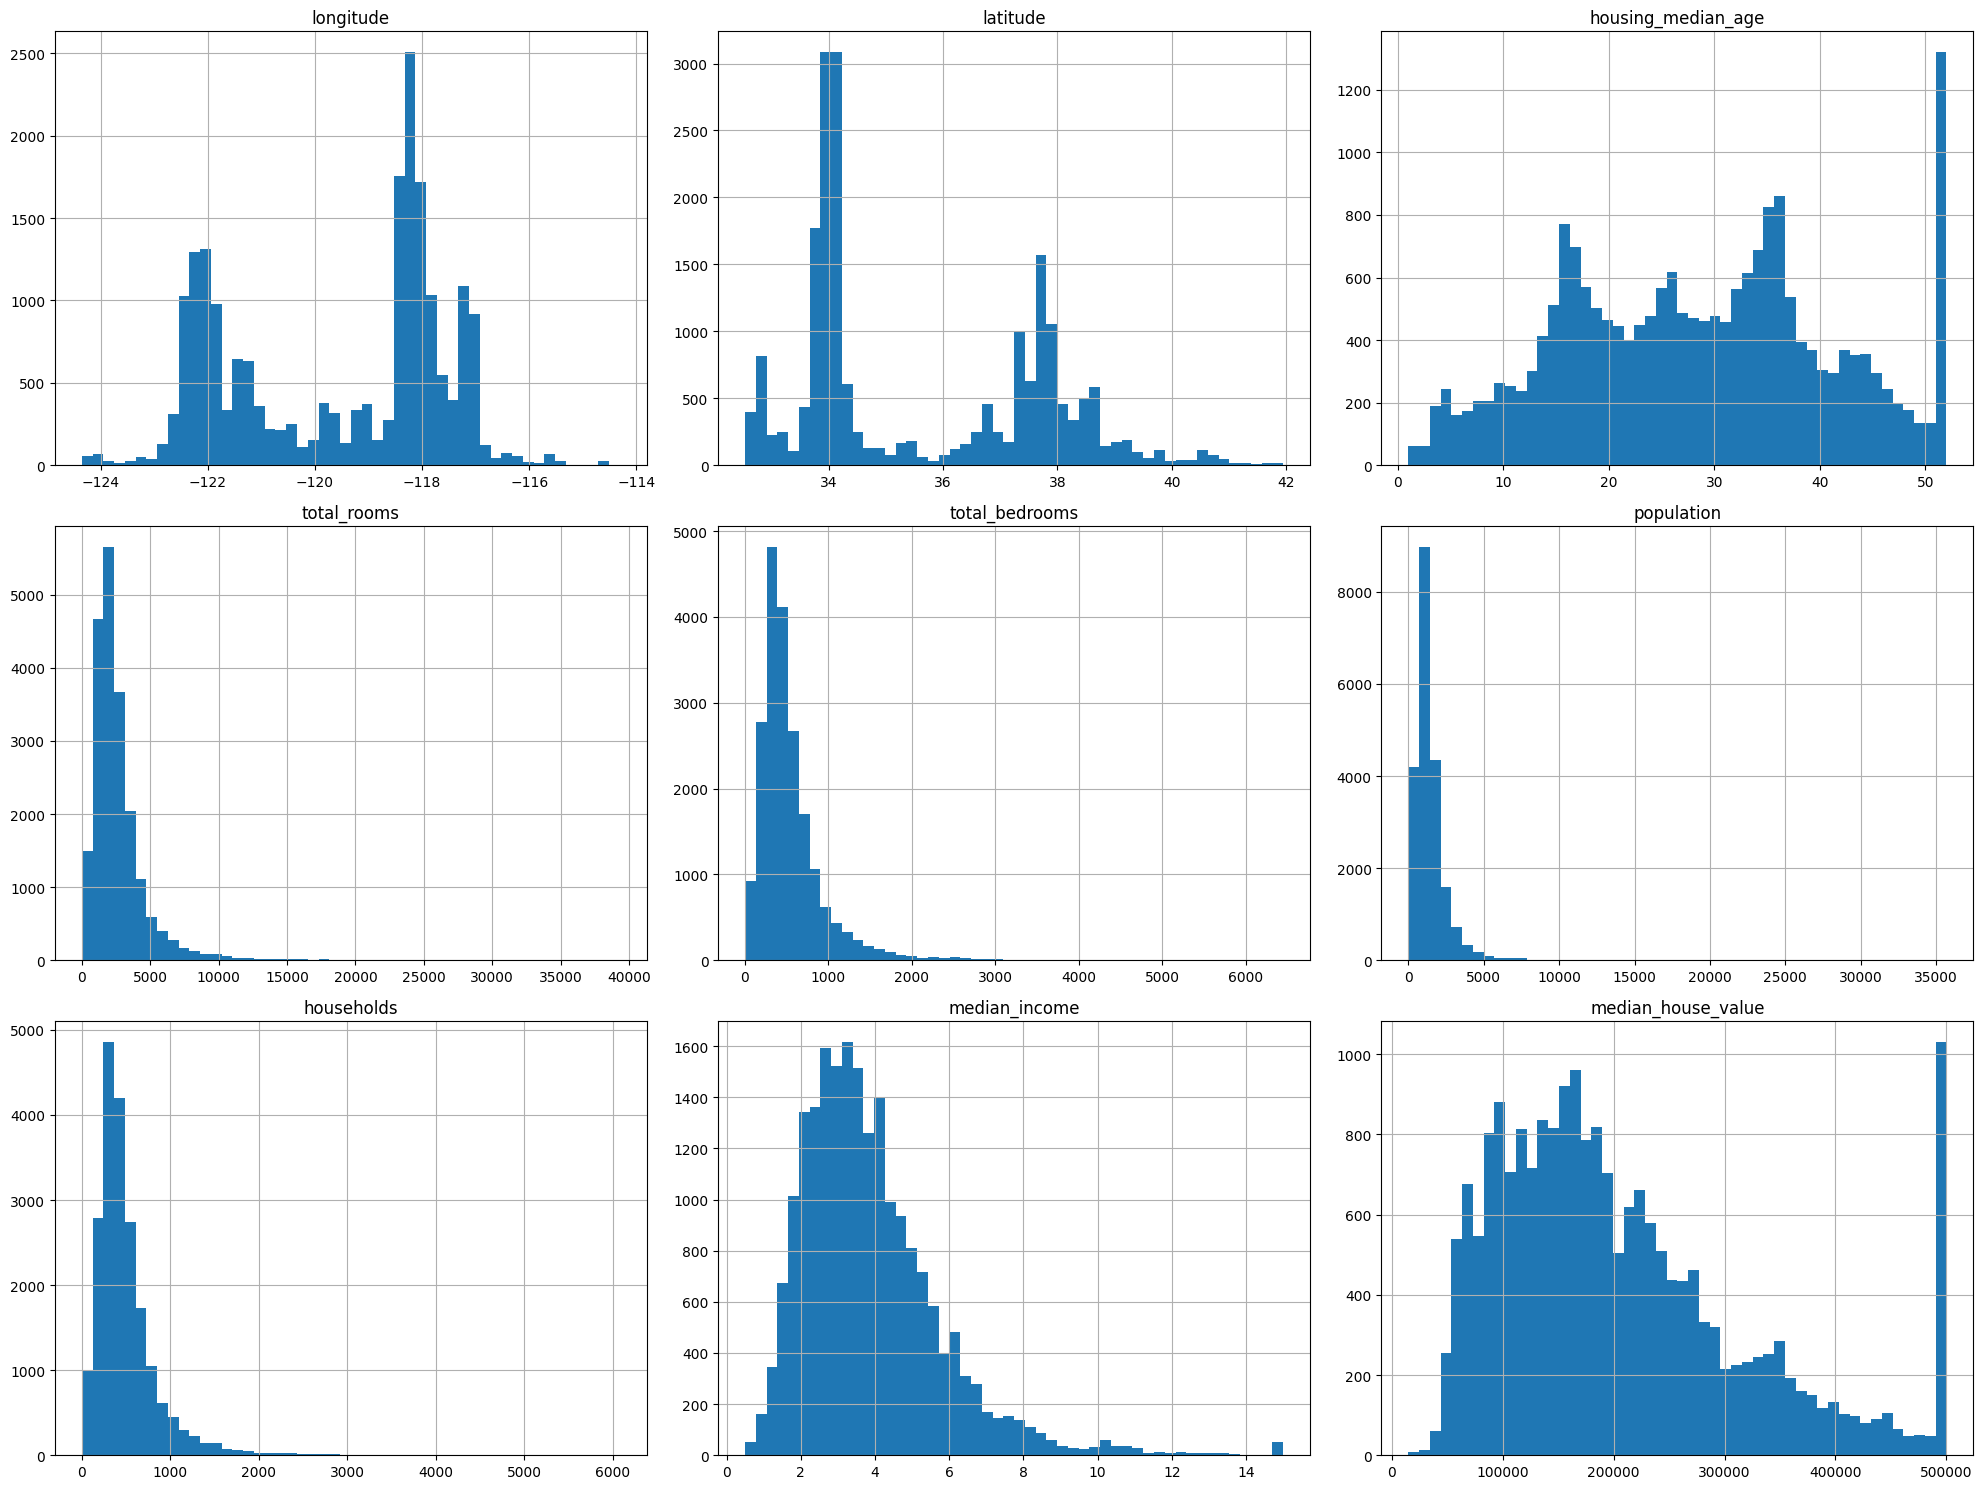

In [54]:
#dataset可視化
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plt")
#plt.show()

## データセットの可視化・相関把握

*データセットをランダムに分割するには*
1. hash値で分類する
   1. これは計算量かかる
2. 一意なレコードによって判別
   1. 経度*100 + 緯度
3. sklearn.split_train_test(dataset, test_ratio, seed)
   1. これが一番妥当な気がする

In [55]:
np.random.seed(46)

#自力で書くとこうなる(seed使っていない)
"""def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_idx = shuffled_indices[:test_set_size]
    train_idx = shuffled_indices[test_set_size:]
    return data.iloc[train_idx], data.iloc[test_idx]"""
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=46)
train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3928,-118.55,34.19,36.0,978.0,170.0,475.0,192.0,4.6750,222500.0,<1H OCEAN
10685,-117.73,33.63,15.0,2874.0,592.0,1382.0,586.0,5.5137,161800.0,<1H OCEAN
3009,-118.99,35.24,40.0,282.0,59.0,213.0,71.0,2.3500,91700.0,INLAND
11616,-118.06,33.80,20.0,1379.0,333.0,937.0,304.0,3.6217,195300.0,<1H OCEAN
4096,-118.41,34.15,24.0,3891.0,866.0,1568.0,830.0,4.1656,364700.0,<1H OCEAN


### 地理データの把握

<Axes: xlabel='longitude', ylabel='latitude'>

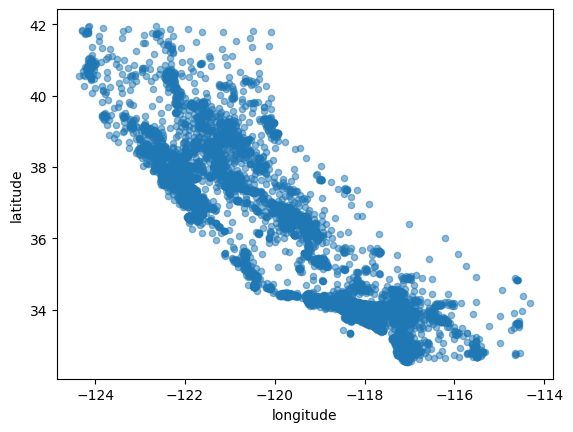

In [56]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5)#alphaで濃度変えれる

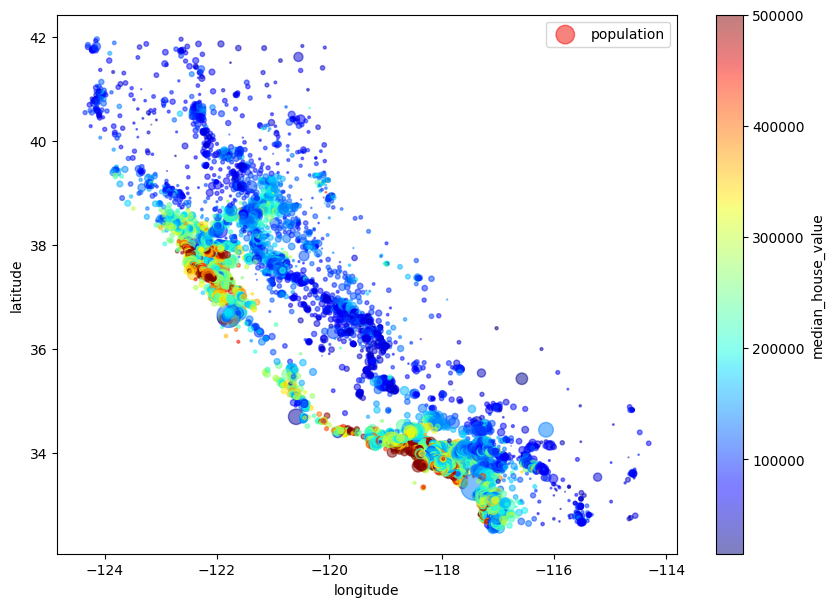

In [57]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

### 層化抽出によるエンコーディング
- 今回のデータセットでは収入の目的変数への寄与率が高いため、注目してみる
    収入のヒストグラムを見て、カテゴリ分けし、層化抽出する

median_category
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

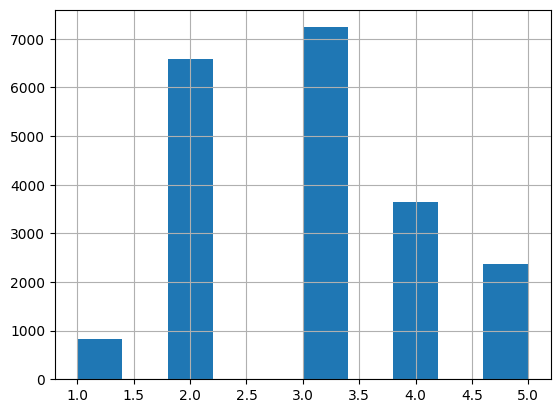

In [58]:
housing["median_category"] = pd.cut(housing["median_income"], 
                                    bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels = [1,2,3,4,5]
                                    )
housing["median_category"].hist()
housing["median_category"].value_counts()

### 相関の可視化
以下で分散共分散行列を作成し、相関を可視化できる
```python
corr_matirix = dataset.corr()
corr_matrix ["目的変数"].sort(ascending=True)
```

- 以下を実行することで目的変数とその他の変数の相関係数を降順に出力できる
    ただし相関係数は何らかの関係があってもそれが相関係数に反映されえるとは限らない。(相関系数ですべて判断するのは不適)

In [59]:
not_cat_housing = housing.copy()
not_cat_housing.drop(["ocean_proximity", "median_category"], axis=1, inplace=True)
corr_matrix = not_cat_housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

相関係数の可視化
```python
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
```
で全カラムの相関係数を可視化できる

11変数の相関を可視化すると121個のグラフになってしまうので主要カラムのみの可視化とする

**以下の実行結果からわかること**
- 相関係数の計算から"median_income"の相関が高かったが、グラフからも本当に正の相関がある
- "median_house_value"を筆頭にいくつかのカラムには観測地に上限がある(グラフにきれいに縦線、横線があらわれている)


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

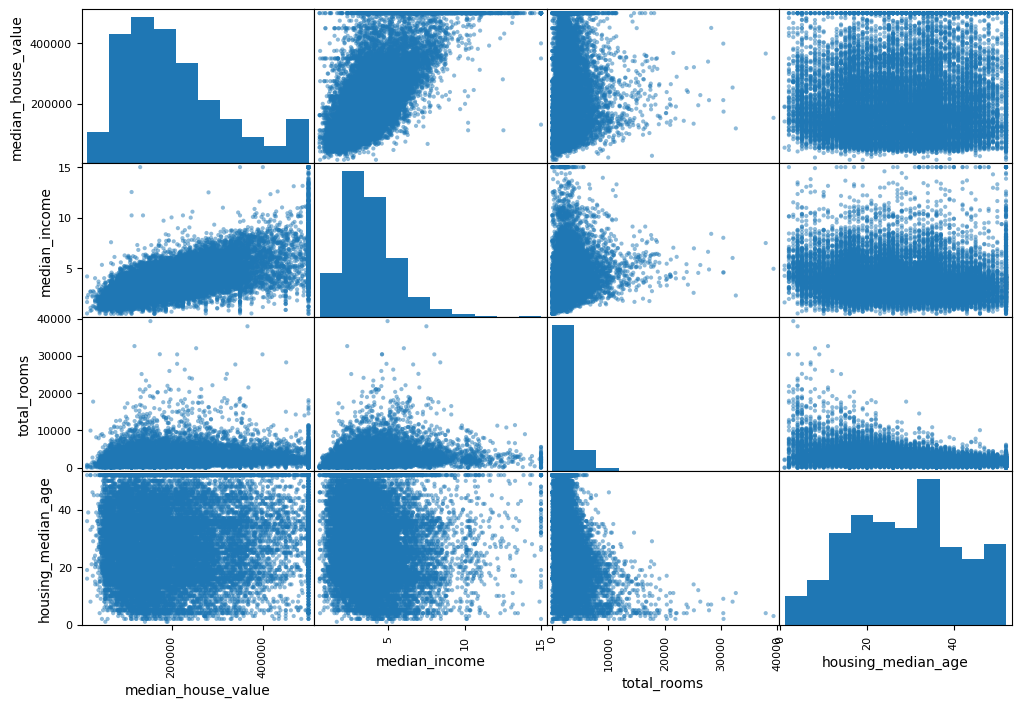

In [60]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(not_cat_housing[attributes], figsize=(12,8))

**新たな相関を見つける**

既存のカラム以外に新たな属性を計算することで相関を見つけることも必要な時がある

今回はroom_per_household,bedrooms_per_room,population_per_householdなどを計算してみると、以下のようにbedrooms_per_roomsが最も高い負の相関を持っている。これは家の価格が上がれば、部屋数が増え、寝室の割合が低下することに一致している

In [61]:
not_cat_housing["rooms_per_household"] = not_cat_housing["total_rooms"]/not_cat_housing["households"]
not_cat_housing["bedrooms_per_rooms"] = not_cat_housing["total_bedrooms"]/not_cat_housing["total_rooms"]
not_cat_housing["population_per_household"] = not_cat_housing["population"]/not_cat_housing["households"]

corr_matrix_newcol = not_cat_housing.corr()
corr_matrix_newcol["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

## データセット分割

基本的に特徴量エンジニアリングすると属性を変更したり、そもそもnumpy配列になり属性判別が困難になる。そこでラベルの分割は早めにやる必要がある？？？

訓練データとテストデータの分割

In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=46)

trainのラベル分割

In [63]:
housing_labels = train_set["median_house_value"].copy()
housing_nonlabel = train_set.drop("median_house_value",axis=1)

## データセット準備


以下のことを行う
1. データのクリーニング
   -  欠損値の処理
2. テキスト・カテゴリ属性の処理
   - テキストの種類が少ないときのカテゴリ変数への変換
   - One Hot Encording
3. カスタム変換機
   - classによりモデルへのハイパーパラメータのon,offを簡単に行えるよう実装
4. 特徴量のスケーリング
   - 標準化・正規化
   - データ変換の一連の流れをパイプラインにより定義し、各カラムに対して変換を簡単に行うよう実装
5. 変換パイプライン

### クリーニング

欠損値への対処は主に３つ
1. 欠損があるレコードの除去
    ```python
    dataset.dropna(subset=["col"])
    ```
2. 属性ごと除去
    ```python
    dataset.drop(["col"], axis=1, inplace=True)
    ```
3. 値の補完(medianでの補完)
    ```python
    median = dataset["col"].median()
    dataset["col"].fillna(median, inplace=True)
    ```

    この方法はscikit-learn.SimpkeImputerでうまく処理できる
    モデル実装後に出現するレコードの欠損に対してもすべてのカラムの中央値を計算しておくことで自動補完してくれる

    - [SimpleImputer公式ドキュメント](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html)

    ```python
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="補完統計量")
    imputer.fit("datasetただしすべて数値属性である必要あり")
    ```

In [64]:
#1.レコードの除去
#housing_nonlabel.dropna(subset=["total_bedrooms"])

#2.属性の除去
#housing_nonlabel.drop("total_bedrooms", axis=1, inpalce=True)

#3.中央値での補完
median = housing_nonlabel["total_bedrooms"].median()
housing_nonlabel["total_bedrooms"].fillna(median, inplace=True)
print(median)
housing_nonlabel["total_bedrooms"].value_counts()


#3-2.SimpleImputerインスタンスによる欠損値補完
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
#imputerは数値属性出ないといけないためocean_proximityを除去
housing_nonlabel_num = housing_nonlabel.drop("ocean_proximity", axis=1)
imputer.fit(housing_nonlabel_num)
imputer.statistics_

"""X = imputer.transform(housing_nonlabel_num)
housing_tr = pd.DataFrame(X, columns=housing_nonlabel_num.columns,
                          index=housing.index)
housing_tr"""

435.0


C:\Users\81809\AppData\Local\Temp\ipykernel_30384\2237398264.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_nonlabel["total_bedrooms"].fillna(median, inplace=True)


'X = imputer.transform(housing_nonlabel_num)\nhousing_tr = pd.DataFrame(X, columns=housing_nonlabel_num.columns,\n                          index=housing.index)\nhousing_tr'

### テキスト・カテゴリ属性の処理

今回テキスト属性は"ocean_proximity"であるためこのカラムに注目してみる。このカラムは取りうる値がごく少数であることが以下のコードからわかる。
この時はカテゴリ変数としてテキストラベルを数値に変換して処理する(**作文などのすべて値が異なるものは厳しい**)。

-> scikit-learn.OrdinalEncoder()を利用

- [OrdinalEncoder()公式ドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

->今回は５種類の値しかとらないため0~4の5値に変換された。しかし**これらには順序関係はないためOnehotEncordingを行うほうが良い**

- [OneHotEncording()公式ドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

- [OneHotEncording()Quita](https://qiita.com/k-y-river/items/23f7a125e12e8f679ff9)

onehotencordingした後は疎行列で帰ってくることに注意(dataset.toarray()を行う)

In [65]:
housing_cat = housing_nonlabel[["ocean_proximity"]]
housing_cat.value_counts()

#5値をカテゴリとして変換
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

#5値には関係性はないのでOne hot Encording
from sklearn.preprocessing import OneHotEncoder
cat_encorder = OneHotEncoder()
housing_cat_1hot = cat_encorder.fit_transform(housing_cat)

#housing_cat_1hotは疎行列!!
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

### カスタム変換機
少し難しいから少しずつ調べて理解する

以下に書かれているコードは"rooms_per_household","population_per_household"の二つを属性として加え、パラメータによってadd_bedrooms_per_roomsをon・off出来る変換器である

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

#col idx
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, rooms_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_household = X[:, population_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                        bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
       
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)   
    

### 特徴量のスケーリング
1. 正規化
   最小・最大スケーリングと呼ばれる。0~1にスケーリングされるが、パラメータ$feature_range$で範囲変えれる。

   sklearn.MinMaxscalerある

2. 標準化
   中心から大きく外れている値は特定の範囲に収まる補用ないため、ニューラルネットなどの特定の値に収めた方がいいものにはあまり適さない
   sklearn.StandardScalerある

### 変換パイプライン
データ変換のいくつかの処理をクラスとしてまとめて、シームレスに実行できるようにしたもの

訓練データに対して特徴量エンジニアリングした後に、最終的に同じ特徴量エンジニアリングをテストデータに施す必要がある。その手間を省くために一つにまとめておくことでかなり便利

<span style = "color: red">注意は、訓練データに対してはtransfomer()を使って訓練するが、テストデータはtransform()によりモデル訓練してはいけない</span>

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#今までの変換器３つのパイプライン
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
    ])

housin_num_tr = num_pipeline.fit_transform(housing_nonlabel_num)
housin_num_tr

array([[ 0.50583186, -0.67168546,  0.59225662, ..., -0.14372006,
        -0.14372006, -0.04290201],
       [ 0.91513626, -0.93384413, -1.07710201, ..., -0.22465842,
        -0.22465842, -0.0444565 ],
       [ 0.2862051 , -0.18013797,  0.9102297 , ..., -0.62338185,
        -0.62338185,  0.04401839],
       ...,
       [-1.53569865,  2.86277509,  0.35377682, ...,  0.01890219,
         0.01890219, -0.06376928],
       [-1.32605493,  1.14938097,  0.67174989, ...,  0.03716094,
         0.03716094,  0.00560753],
       [ 1.23958488, -1.17727717,  0.19479028, ..., -0.57000568,
        -0.57000568,  0.10981951]])

In [68]:
#housing_nonlabel_num.shape

次に数値属性とカテゴリ属性を同時に変換する処理をしたい。

sklearn.ColumnTransferが相性いい

In [69]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_nonlabel_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing_nonlabel)
housing_prepared[0]


array([ 0.50583186, -0.67168546,  0.59225662, -0.75915861, -0.87027851,
       -0.83565363, -0.80141077,  0.4225854 ,  0.94054828, -0.14372006,
       -0.14372006, -0.04290201,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

## モデルの選択と訓練

今回モデルとして試してみたのは以下のモデル
1. 線形回帰
   
    [線形回帰公式ドキュメント](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html)
2. 決定木
3. SVM

また、交差検証を用いたK-fold-validationを行っている

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

#予測精度の検証
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

#print("Predictions:", lin_reg.predict(some_data_prepared))
#print("Labels:", list(some_labels))

#RMSEの計算
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

#最近のバージョンだとsquared=Falseでrmse計算される(無理ならnp.sqrt()すればいい)
lin_rmse2 = mean_squared_error(housing_labels, housing_predictions, squared=False)
print(lin_rmse2)

68497.62545702801


c:\Users\81809\anaconda3\envs\deep_learning_pytorch\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


データ５レコードに対して予測誤差(RMSE)を計算すると68440となった。目的変数は0~500000の間に位置しているため誤差はかなり大きく、過小適合している(linear_regressionだとそんなもん)

次に決定木による予測モデルの構築をしてみる.するとRMSEは0,すべての予測値と実データは一致している。これは完全に過学習を起こしている。

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state =42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print(tree_rmse)

0.0


c:\Users\81809\anaconda3\envs\deep_learning_pytorch\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 交差検証法

線形回帰や決定木、ランダムフォレスト、SVMに対して交差検証をして、過学習を判断する。

pickelへの保存のコードでモデル学習から保存まで一括して行っているから途中のコードは見なくていい

*K-fold cross validdation*
```python
scores = cross_val_score(model, X, y, cv=k, scoring="neg_mean_squared_error")
```
scoreはMSEの負の数となることに注意

In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores.mean())
print(tree_rmse_scores.std())


70707.80886121852
2347.4139195245057


In [73]:
#CV値を増やして、精度平均と標準偏差出す
#時間かかる

"""for cv in [5,10,15,20,30]:
    scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=cv)
    tree_rmse_scores = np.sqrt(-scores)
    print("cv:",cv)
    print("mean:", tree_rmse_scores.mean())
    print("std:", tree_rmse_scores.std())"""

'for cv in [5,10,15,20,30]:\n    scores = cross_val_score(tree_reg, housing_prepared, housing_labels,\n                             scoring="neg_mean_squared_error", cv=cv)\n    tree_rmse_scores = np.sqrt(-scores)\n    print("cv:",cv)\n    print("mean:", tree_rmse_scores.mean())\n    print("std:", tree_rmse_scores.std())'

In [74]:
#lin_reg
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores.mean())
print(lin_rmse_scores.std())

69326.19060790798
2145.237261757661


In [75]:
"""#ramdomforestのモデル構築とk-fold cross validation
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predisctions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse=np.sqrt(forest_mse)
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores.mean())
print(forest_rmse_scores.std())"""

'#ramdomforestのモデル構築とk-fold cross validation\nfrom sklearn.ensemble import RandomForestRegressor\n\nforest_reg = RandomForestRegressor(n_estimators=100, random_state=42)\nforest_reg.fit(housing_prepared, housing_labels)\n\nhousing_predisctions = forest_reg.predict(housing_prepared)\nforest_mse = mean_squared_error(housing_labels, housing_predictions)\nforest_rmse=np.sqrt(forest_mse)\nprint(forest_rmse)\n\nforest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)\nforest_rmse_scores = np.sqrt(-forest_scores)\nprint(forest_rmse_scores.mean())\nprint(forest_rmse_scores.std())'

In [76]:
"""#SVMのモデル構築
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print(svm_rmse)"""


'#SVMのモデル構築\nfrom sklearn.svm import SVR\n\nsvm_reg = SVR(kernel="linear")\nsvm_reg.fit(housing_prepared, housing_labels)\nhousing_predictions = svm_reg.predict(housing_prepared)\nsvm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)\nprint(svm_rmse)'

## モデルの保存

実験したモデルの保存を行う。モデル詳細、ハイパーパラメータ、予測精度、交差検証スコアなどの記録

主にpickle,joblibで保存されるが、それぞれ保存速度、保存サイズで優れている(基本的にpickleでよさそう)

- [pickel,jobklibサイト1](https://www.salesanalytics.co.jp/datascience/datascience044/)
- [pickle,joblibサイト2](https://takaishikawa42.hatenablog.com/entry/2019/01/17/225615)

以下のコードがテンプレになっている

### 3モデルを学習し、pickleに保存
<span style="color: yellow;">かなり簡潔にまとめられていてよい！！</span>

In [77]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

X_train, y_train = housing_prepared, housing_labels
X_test = housing_prepared#これX_trainと同じにしてるけど本当はダメ！！

SAVE_DIR = os.path.join(".", "models_pickle")
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)


models = {
    'linear_regression': LinearRegression(),
    'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'svm': SVR()
}


for model_name, model in models.items():
    model.fit(X_train, y_train)

    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)

    y_pred = model.predict(X_test)

    data_to_save = {
        'model': model,
        'params': model.get_params(),
        'cv_scores': rmse_scores,
        'predictions': y_pred
    }

    # pickleファイルに保存
    filename = os.path.join(SAVE_DIR, f'{model_name}_model.pkl')
    with open(filename, 'wb') as f:
        pickle.dump(data_to_save, f)

# pickleファイルの読み込みと結果の表示(lin_reg)
with open(os.path.join(SAVE_DIR, 'linear_regression_model.pkl'), 'rb') as f:
    loaded_data = pickle.load(f)

loaded_model = loaded_data['model']
loaded_params = loaded_data['params']
loaded_scores = loaded_data['cv_scores']
loaded_predictions = loaded_data['predictions']

print("Loaded Model:", type(loaded_model).__name__)
print("Parameters:", loaded_params)
print("CV Scores:", loaded_scores)
print("Predictions:", loaded_predictions[:5])  

Loaded Model: LinearRegression
Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
CV Scores: [67963.96441443 68887.90396952 70735.28959287 74172.5986486
 69779.35999442 69043.27640532 71029.2682251  67390.28014561
 68109.5627981  66150.40188512]
Predictions: [268013.77148438 281692.58398438 115572.83398438 201719.20898438
 266829.08398438]


## モデルのチューニング

1. グリッドサーチ
   
    指定したハイパーパラメータの組み合わせをすべて試してくれる.何も手掛かりがないときは10^kで設定して絞っていく
2. ランダムサーチ
    ランダムなパラメータ値を指定回数会探索する。実行時間や資源の予算を管理しやすい。グリッドサーチと違って、各パラメータが違う値で実験できる
3. アンサンブル
4. 最良のモデルに対する新たな知見
    属性のスコアの値

5. 最終的にテストセットでシステム評価

In [78]:
#グリッドサーチ
#3*4+2*3通りのハイパーパラメータに対して*5のk-fold cross validation

from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [79]:
cvres = grid_search.cv_results_
for maen_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-maen_score), params)

63911.368027032586 {'max_features': 2, 'n_estimators': 3}
55930.798833805246 {'max_features': 2, 'n_estimators': 10}
53448.80062012492 {'max_features': 2, 'n_estimators': 30}
60704.84239834557 {'max_features': 4, 'n_estimators': 3}
53258.158020465904 {'max_features': 4, 'n_estimators': 10}
51092.175463994216 {'max_features': 4, 'n_estimators': 30}
60320.530886242756 {'max_features': 6, 'n_estimators': 3}
53074.48053201836 {'max_features': 6, 'n_estimators': 10}
50756.41437228237 {'max_features': 6, 'n_estimators': 30}
58316.10380125034 {'max_features': 8, 'n_estimators': 3}
51864.869078982025 {'max_features': 8, 'n_estimators': 10}
50195.59609221431 {'max_features': 8, 'n_estimators': 30}
62592.13387510889 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54853.53502635328 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60669.928230169004 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53205.00509974475 {'bootstrap': False, 'max_features': 3, 'n_estimato

次にランダムサーチ

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49494.98571557245 {'max_features': 7, 'n_estimators': 180}
51631.4349396072 {'max_features': 5, 'n_estimators': 15}
51266.192833860376 {'max_features': 3, 'n_estimators': 72}
51080.62159650017 {'max_features': 5, 'n_estimators': 21}
49560.24808876419 {'max_features': 7, 'n_estimators': 122}
51276.43651856537 {'max_features': 3, 'n_estimators': 75}
51137.05507796492 {'max_features': 3, 'n_estimators': 88}
50152.534351436676 {'max_features': 5, 'n_estimators': 100}
50878.43833007337 {'max_features': 3, 'n_estimators': 150}
65367.77334993922 {'max_features': 5, 'n_estimators': 2}


次に最良モデルに対する誤差の評価を行う

In [81]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30113873169934846, 'median_income'),
 (0.13531548874537525, 'median_category'),
 (0.1270841023276599, 'INLAND'),
 (0.11983890749116981, 'bedrooms_per_room'),
 (0.07423737057891328, 'longitude'),
 (0.06781829892561003, 'latitude'),
 (0.04280461985780985, 'housing_median_age'),
 (0.026780114313048574, 'rooms_per_hhold'),
 (0.02534226316072619, 'pop_per_hhold'),
 (0.01743246538252555, 'total_bedrooms'),
 (0.01656782350038419, 'population'),
 (0.016124620069506254, 'total_rooms'),
 (0.015816199771565162, 'households'),
 (0.006698483887470251, '<1H OCEAN'),
 (0.004254465931297478, 'NEAR OCEAN'),
 (0.0024508413164569297, 'NEAR BAY'),
 (0.0002952030411328187, 'ISLAND')]

テストセットでシステム評価

<span style="color: yellow;">これが大事</span>

In [86]:
final_model = grid_search.best_estimator_
y_test = test_set["median_house_value"].copy()
x_test = test_set.drop(["median_house_value"], axis=1)

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

49648.98580122566


c:\Users\81809\anaconda3\envs\deep_learning_pytorch\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
